<a href="https://colab.research.google.com/github/PravalikaMuthoju/STAT_ML_PROJECT/blob/main/CREDITCARD_FRAUD_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [ ]:
data  = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.shape

(45646, 31)

In [ ]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.size



1415026

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,45646.000000,45646.000000,45646.000000,45646.000000,45646.000000,45646.000000,45645.000000,45645.000000,45645.000000,45645.000000,...,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000
mean,27545.441331,-0.237544,0.028942,0.696718,0.191505,-0.248407,0.098588,-0.117937,0.053331,0.157893,...,-0.027098,-0.108684,-0.039060,0.009358,0.136697,0.022305,0.005524,0.004641,90.829574,0.003111
std,12907.770469,1.886548,1.613070,1.530553,1.403936,1.414608,1.308548,1.282818,1.210502,1.222268,...,0.733323,0.636670,0.572037,0.592176,0.437824,0.502716,0.389241,0.338798,240.298594,0.055690
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,19891.000000,-0.985248,-0.543868,0.222804,-0.714566,-0.853436,-0.638480,-0.600071,-0.148358,-0.589301,...,-0.232743,-0.529609,-0.179136,-0.322003,-0.128065,-0.329709,-0.063670,-0.006837,7.580000,0.000000
50%,32447.000000,-0.246259,0.088873,0.801638,0.191835,-0.280620,-0.155353,-0.073143,0.054815,0.038334,...,-0.070241,-0.083448,-0.051304,0.062230,0.175771,-0.067778,0.008425,0.021814,24.990000,0.000000
75%,37571.750000,1.157412,0.739723,1.434911,1.070924,0.287608,0.487645,0.429944,0.324345,0.859738,...,0.105614,0.303459,0.077905,0.401392,0.421857,0.302819,0.084017,0.076209,82.600000,0.000000
max,42437.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [ ]:

data['Class'].value_counts()
# 0 indicates not a fraud credit(normal)
# 1 indicates a fraud credit


,count
Class,
0.0,45503
1.0,142


In [ ]:
data.isnull().sum() # no null values in the data set

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


([<matplotlib.patches.Wedge at 0x7873e731a500>,
 [Text(-2.199894931216852, 0.021500967568968903, 'Normal'),
  Text(2.1998949325536494, -0.02150083079266027, 'Fraud')])

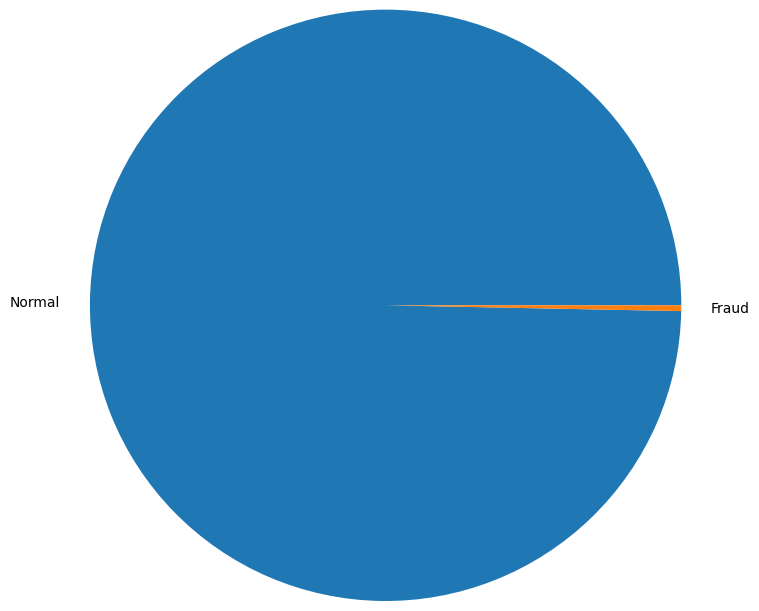

In [ ]:
data['Class'].value_counts()

plt.pie(data['Class'].value_counts() ,labels=['Normal','Fraud'],radius=2)

In [ ]:
from sklearn.model_selection import train_test_split

# 1. **Logistic** **Regression**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [ ]:
data = data.dropna(subset=['Class'])    #train test split
X = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# Balance the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
logistic_models = {"Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=0.1, random_state=42)}

In [ ]:

print("\nClass distribution after balancing:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after balancing:
Class
0.0    34127
1.0    34127
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model train

In [ ]:
logistic = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, C=1.0)
logistic.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
#  Predictions
y_train_pred = logistic.predict(X_train_scaled)
y_test_pred = logistic.predict(X_test_scaled)

In [ ]:
#  Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.99


In [ ]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11376
         1.0       0.18      0.94      0.30        36

    accuracy                           0.99     11412
   macro avg       0.59      0.97      0.65     11412
weighted avg       1.00      0.99      0.99     11412



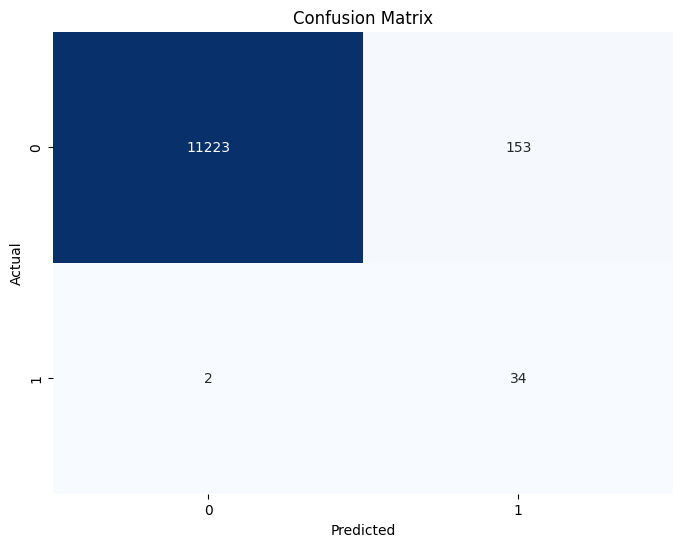

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Class Distribution:
Class
0.0    45503
1.0      142
Name: count, dtype: int64


<ipython-input-30-84aa2bd90d13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


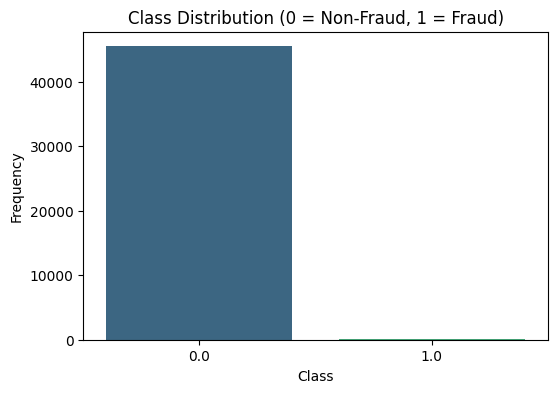

In [ ]:

class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


#2. K-NEAREST NEIGHBORS (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#best n_neighbours optimization

param_grid = {'n_neighbors': range(3, 30, 2), 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(metric='minkowski', p=2), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
KNN_Model={"KNN (Regularized)": KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski', p=2)}

In [ ]:
# model training
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predictions
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

In [ ]:
#  Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred_knn)
test_accuracy = accuracy_score(y_test, y_test_pred_knn)


In [ ]:

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_knn))

Training Accuracy: 1.00
Testing Accuracy: 1.00

Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11376
         1.0       0.92      0.94      0.93        36

    accuracy                           1.00     11412
   macro avg       0.96      0.97      0.97     11412
weighted avg       1.00      1.00      1.00     11412



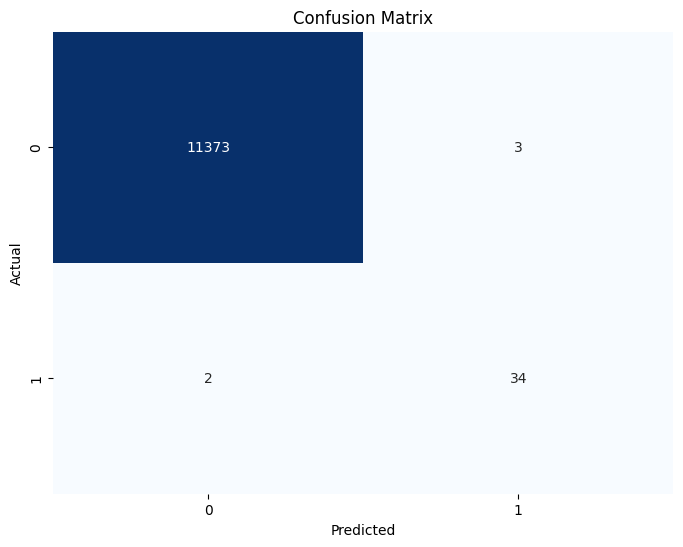

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. SUPPORT VECTOR MACHINE (SVM)

In [ ]:

from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

In [ ]:

# regularization & model training
C_value = 0.1
svm_model = SVC(kernel='linear', C=C_value, random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)
y_train_pred = svm_model.predict(X_train)

In [ ]:

testing_accuracy = accuracy_score(y_test, y_pred)

training_accuracy = accuracy_score(y_train, y_train_pred)

print(f"SVM  Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"SVM   Testing Accuracy: {testing_accuracy * 100:.2f}%")


SVM  Training Accuracy: 99.84%
SVM   Testing Accuracy: 99.75%


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM (with C={C_value}) Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM (with C=0.1) Accuracy: 99.75%
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11376
         1.0       0.59      0.75      0.66        36

    accuracy                           1.00     11412
   macro avg       0.79      0.87      0.83     11412
weighted avg       1.00      1.00      1.00     11412



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[11357    19]
 [    9    27]]


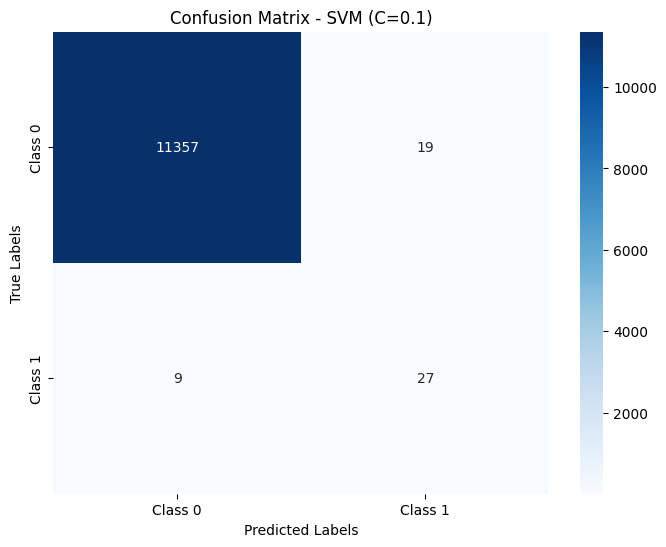

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f"Confusion Matrix - SVM (C={C_value})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 4.PERCEPTRON

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:

# Regularization & model train
perceptron = Perceptron(penalty='l2', alpha=0.01, random_state=42, max_iter=1000)
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.01, penalty='l2', random_state=42)

In [ ]:



# Step 5: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Perceptron Model with Class Balancing
perceptron = Perceptron(
    max_iter=1000, random_state=42, class_weight="balanced", eta0=0.1, tol=1e-4
)
perceptron.fit(X_train_scaled, y_train)

# Step 7: Predictions
y_train_pred = perceptron.predict(X_train_scaled)
y_test_pred = perceptron.predict(X_test_scaled)

# Step 8: Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Class Distribution
class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Bar plot of class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
